In [1]:
!pip install -q kaggle

In [2]:
import tensorflow as tf

In [6]:
import pandas as pd

csv_path = '/content/sample_data/california_housing_test.csv'
df = pd.read_csv(csv_path)

print(df.head())  # Shows first 5 rows of the CSV data


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.05     37.37                27.0       3885.0           661.0   
1    -118.30     34.26                43.0       1510.0           310.0   
2    -117.81     33.78                27.0       3589.0           507.0   
3    -118.36     33.82                28.0         67.0            15.0   
4    -119.67     36.33                19.0       1241.0           244.0   

   population  households  median_income  median_house_value  
0      1537.0       606.0         6.6085            344700.0  
1       809.0       277.0         3.5990            176500.0  
2      1484.0       495.0         5.7934            270500.0  
3        49.0        11.0         6.1359            330000.0  
4       850.0       237.0         2.9375             81700.0  


In [9]:
!ls


archive.zip  sample_data


In [10]:
import zipfile

zip_path = 'archive.zip'  # your actual ZIP file name

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('trash_dataset')

print("Unzipped archive.zip successfully!")


Unzipped archive.zip successfully!


In [11]:
!ls trash_dataset


TrashType_Image_Dataset


In [13]:
import os

data_dir = '/content/trash_dataset'  # Change this if your dataset path is different

# List class folders inside the dataset directory
classes = os.listdir(data_dir)
print("Classes found:", classes)

# Count and print number of images in each class folder
for cls in classes:
    folder = os.path.join(data_dir, cls)
    num_images = len(os.listdir(folder))
    print(f"{cls}: {num_images} images")


Classes found: ['TrashType_Image_Dataset']
TrashType_Image_Dataset: 6 images


In [14]:
data_dir = '/content/trash_dataset/TrashType_Image_Dataset'

classes = os.listdir(data_dir)
print("Classes found:", classes)

for cls in classes:
    folder = os.path.join(data_dir, cls)
    num_images = len(os.listdir(folder))
    print(f"{cls}: {num_images} images")


Classes found: ['glass', 'trash', 'metal', 'plastic', 'cardboard', 'paper']
glass: 501 images
trash: 137 images
metal: 410 images
plastic: 482 images
cardboard: 403 images
paper: 594 images


In [15]:
from tensorflow.keras import layers, models

# Example: Simple CNN model architecture
model = models.Sequential([
    layers.InputLayer(input_shape=(224, 224, 3)),  # input size of images
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(6, activation='softmax')  # assuming 6 classes in dataset
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()  # Prints model architecture


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,908,166 (91.20 MB)

 Trainable params: 23,908,166 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

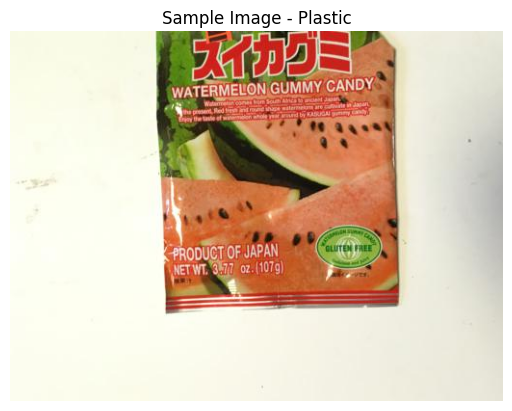

In [16]:
from PIL import Image
import matplotlib.pyplot as plt

# Example: pick first image in 'plastic' class
sample_img_path = os.path.join(data_dir, 'plastic', os.listdir(os.path.join(data_dir, 'plastic'))[0])
img = Image.open(sample_img_path)

plt.imshow(img)
plt.axis('off')
plt.title('Sample Image - Plastic')
plt.show()


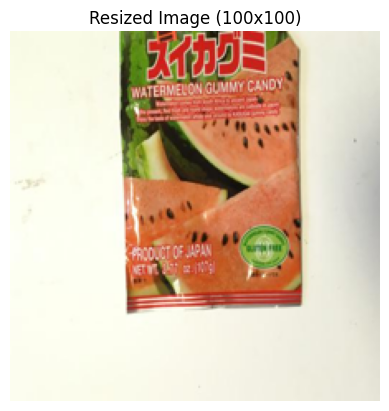

In [18]:
img_resized = img.resize((224, 224))  # resize to 224x224 pixels
plt.imshow(img_resized)
plt.axis('off')
plt.title('Resized Image (100x100)')
plt.show()


In [19]:
import numpy as np

img_array = np.array(img_resized) / 255.0  # normalize pixel values to 0-1
print("Image shape:", img_array.shape)


Image shape: (224, 224, 3)
